In [52]:
import numpy as np
import pandas as pd

In [10]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Data-Analytics/football_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_data = data.select_dtypes(include=numerics)
new_data = new_data.drop(['Unnamed: 0', 'ID','Jersey Number'], axis=1)

new_data.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [12]:
# Convert wage and value to float
def convert_Wage_Value(i):
  num=''
  for j in range(1,len(i)):
    if (i[j]<='9' and i[j]>='0') or i[j]=='.':
      num+=(i[j])
    if i[j]=='K':
      val=float(num)
      val*=1000  
      return val
    if i[j]=='M':
      val=float(num)
      val*=1e6  
      return val 
  return float(num)  

Value=pd.Series([],dtype=pd.StringDtype()) 
Wage=pd.Series([],dtype=pd.StringDtype()) 

for i in range(len(data['Value'])):
  Value[i]=convert_Wage_Value(data['Value'][i])
  Wage[i]=convert_Wage_Value(data['Wage'][i])
# inserting value and wage into dataframe after converting into numberical attributes
new_data.insert(2,'Value',Value,True)
new_data.insert(2,'Wage',Wage,True)

new_data.head()

,Age,Overall,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,260000.0,72000000.0,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [13]:
import re
# converting height in numberical and inserting into dataframe
def HeightConvert(cell):
  cell=str(cell)
  if cell[len((cell))-2]=="'":
    cell=re.sub("[']",".0",(cell))
  else:
    cell=re.sub("[']",".",(cell))
  return float(cell)
  
Height=pd.Series([],dtype=pd.StringDtype()) 
for i in range(len(new_data.index)):
  Height[i]=HeightConvert(data['Height'][i])
new_data.insert(2,'Height',Height,True)  
# new_data.describe()

new_data.head()

,Age,Overall,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,5.07,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,6.02,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,5.09,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,6.04,260000.0,72000000.0,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,5.11,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [14]:
Weight=pd.Series([],dtype=pd.StringDtype()) 
for (coln,cold) in data.iteritems():
  if coln=="Weight":
    Weight = data[coln].apply(lambda weight : float(weight[:-3]) if type(weight) is str else float(weight))
# converting weight in numerical

# new_data.head()
new_data.insert(2,'Weight',Weight,True)
PositionsList = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for (coln, cold) in data.iteritems():
  if coln in PositionsList:
    data[coln] = data[coln].apply(lambda position : int(position[:-2]) +  (int(position[3:4])//2) if type(position) is str else float(position))
    new_data.insert(2,coln,data[coln],True)

# converting all the attributes from list PositonsList in numerical and inserting into dataframe

new_data.describe()

,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,18159.000000,18159.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,57.80691,56.614750,56.614750,56.614750,57.80691,58.513398,57.825270,57.825270,57.825270,58.513398,60.734834,59.221002,59.221002,59.221002,60.734834,59.983253,59.983253,59.983253,60.037774,59.719514,59.719514,59.719514,60.037774,58.815594,58.815594,58.815594,165.979129,5.545641,9731.312133,2.410696e+06,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,9.51627,11.702684,11.702684,11.702684,9.51627,8.956184,10.068153,10.068153,10.068153,8.956184,9.231938,8.780952,8.780952,8.780952,9.231938,9.749195,9.749195,9.749195,9.860040,9.820331,9.820331,9.820331,9.860040,9.108812,9.108812,9.108812,15.593344,0.461820,21999.290406,5.594933e+06,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,30.00000,26.000000,26.000000,26.000000,30.00000,31.000000,29.000000,29.000000,29.000000,31.000000,28.000000,31.000000,31.000000,31.000000,28.000000,28.000000,28.000000,28.000000,26.000000,28.000000,28.000000,28.000000,26.000000,32.000000,32.000000,32.000000,110.000000,5.010000,0.000000,0.000000e+00,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,51.00000,47.000000,47.000000,47.000000,51.00000,52.000000,50.000000,50.000000,50.000000,52.000000,55.000000,53.000000,53.000000,53.000000,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,154.000000,5.090000,1000.000000,3.000000e+05,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000

In [15]:
# droping rows and columns which contain Nan values
# new_data=new_data.dropna()
# new_data.reset_index(drop = True)
# print(new_data)
# new_data.describe()

# Forward fill = Filling the empty NaN values in data
new_data.fillna(method ='ffill', inplace = True)

In [81]:
from sklearn.preprocessing import StandardScaler, normalize 

# Scaling data so that all the features become comparable
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

# Normalizing data so that it follows gaussian distribution
normalized_data = normalize(data_scaled)

# Converting numpy array to dataframe
normalized_data = pd.DataFrame(normalized_data)

normalized_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,0.033019,0.105411,0.006563,-0.018863,-0.018863,-0.018863,0.006563,0.019517,0.011433,0.011433,0.011433,0.019517,0.089116,0.077141,0.077141,0.077141,0.089116,0.091690,0.091690,0.091690,0.088005,0.091717,0.091717,0.091717,0.088005,0.086907,0.086907,0.086907,-0.011712,-0.026957,0.662141,0.506809,0.097011,0.058147,0.259105,0.041863,0.056942,0.049019,0.066494,0.026760,0.055971,0.063927,0.057837,0.065358,0.076837,0.058769,0.059254,0.046363,0.038112,0.048928,0.096660,0.057633,0.045029,0.006463,0.014436,-0.013158,0.063872,-0.011934,-0.031375,0.059252,0.075332,0.044263,0.085748,-0.018893,-0.023916,-0.024292,-0.015749,-0.008358,-0.001939,-0.003653,-0.012706
1,0.055514,0.132233,0.015126,-0.006802,-0.006802,-0.006802,0.015126,0.028141,0.014342,0.014342,0.014342,0.028141,0.101139,0.085616,0.085616,0.085616,0.101139,0.098228,0.098228,0.098228,0.100414,0.105050,0.105050,0.105050,0.100414,0.119784,0.119784,0.119784,0.036003,0.033889,0.591280,0.438724,0.121696,0.076081,0.325034,0.052515,0.114996,0.061492,0.081728,0.069592,0.050049,0.082052,0.056881,0.060554,0.062486,0.052241,0.070382,0.053748,0.059054,0.052452,0.124910,0.014031,0.075582,0.083378,0.051247,0.035955,0.078418,0.013479,-0.028222,0.076016,0.066598,0.076492,0.104689,-0.031966,-0.025441,-0.035114,-0.017894,-0.010485,-0.002432,-0.004582,-0.010436
2,0.005976,0.118552,0.011284,-0.022861,-0.022861,-0.022861,0.011284,0.027188,0.010711,0.010711,0.010711,0.027188,0.097715,0.082717,0.082717,0.082717,0.097715,0.098147,0.098147,0.098147,0.097014,0.098271,0.098271,0.098271,0.097014,0.091466,0.091466,0.091466,-0.032561,-0.031295,0.405057,0.659702,0.112394,0.063591,0.314029,0.098940,0.111102,0.050742,0.067566,0.017778,0.054848,0.073887,0.068415,0.070584,0.080387,0.052548,0.069907,0.062586,0.054882,0.070079,0.113619,0.045080,0.045349,-0.011021,0.035505,-0.041289,0.057632,0.000196,-0.016506,0.063662,0.075576,0.065800,0.098365,-0.032481,-0.034861,-0.018979,-0.013690,-0.013896,-0.002350,-0.002559,-0.010082
3,0.015714,0.140061,0.013870,-0.028100,-0.028100,-0.028100,0.013870,0.033419,0.013165,0.013165,0.013165,0.033419,0.120106,0.101672,0.101672,0.101672,0.120106,0.120637,0.120637,0.120637,0.119245,0.120789,0.120789,0.120789,0.119245,0.112425,0.112425,0.112425,0.005129,0.041937,0.444583,0.486074,0.138149,-0.018180,0.286688,0.003114,-0.070378,-0.069740,-0.065017,-0.070461,-0.023044,-0.065884,-0.077209,-0.055361,-0.053287,-0.004288,-0.038333,-0.020014,-0.018003,-0.009260,0.122297,-0.058067,-0.055375,0.006317,-0.049820,-0.004027,-0.070983,-0.040300,-0.031625,-0.076027,0.040431,-0.021201,0.032061,-0.063482,-0.048265,-0.060069,0.162292,0.158809,0.167816,0.164507,0.168443
4,0.013198,0.117633,0.056339,0.029652,0.029652,0.029652,0.056339,0.071853,0.066269,0.066269,0.066269,0.071853,0.100873,0.107640,0.107640,0.107640,0.100873,0.097970,0.097970,0.097970,0.093512,0.094795,0.094795,0.094795,0.093512,0.087267,0.087267,0.087267,-0.025187,-0.030885,0.515129,0.584233,0.110679,0.082263,0.240781,0.102139,0.071243,0.077437,0.061348,0.005116,0.074497,0.072568,0.053258,0.067521,0.075472,0.082099,0.064290,0.029401,0.025254,0.034509,0.106358,0.030266,0.067766,-0.005816,0.055243,0.025396,0.074809,0.038035,0.022630,0.062354,0.094252,0.063745,0.084325,0.034071,0.015563,0.008178,-0.002989,-0.006570,-0.022338,-0.012286,-0.006748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,-0.138991,-0.295226,-0.128939,-0.094339,-0.094339,-0.094339,-0.128939,-0.156850,-0.121647,-0.121647,-0.121647,-0.156850,-0.177516,-0.155367,-0.155367,-0.155367,-0.177516,-0.148821,-0.148821,-0.148821,-0.158956,-0.15

In [82]:
vector = normalized_data.to_numpy().tolist()
# vector[0] # vector[0] = all values of messi (vector of a point)

In [95]:
def cluster_quality(index_of_cluster, cluster, vector):
  if len(cluster[index_of_cluster])==0 or len(cluster[index_of_cluster])==1:
    return 0
  
  pts = []
  for i in cluster[index_of_cluster]:
    pts.append(vector[i])
  pts=np.array(pts)
  centroid = np.mean(pts,axis=0)

  quality=0
  for i in cluster[index_of_cluster]:
    quality+=np.linalg.norm(vector[i]-centroid)**2
  return quality

# testing the func
c1 = [[0,1]]
v1 = [[2],[2]]
print(cluster_quality(0,c1,v1))

0.0


In [99]:
from queue import PriorityQueue
from sklearn.cluster import KMeans

# cluster[i] = stores index of pts in ith cluster
cluster = []

# Putting all index of vectors into one 1 cluster initially
cluster.append([i for i in range(len(normalized_data[0]))])


k=10 # no of clusters
q = PriorityQueue()

# putting (-quality,index) into priority queue for decreasing queue
q.put((-cluster_quality(0,cluster,vector),0))

count = 1
while count < k and q.empty() == False:
  pair = q.get()
  err = pair[0]
  index = pair[1]

  kmean_data = []
  for i in cluster[index]:
    kmean_data.append(vector[i])
  kmean_data=np.array(kmean_data)

  # print(kmean_data)

  Kmeans=KMeans(n_clusters=2).fit(kmean_data)
  label = Kmeans.labels_
  # from collections import Counter
  # print(Counter(label).values())

  arr1 = []
  arr2 = []
  for i in range(len(kmean_data)):
    if int(label[i]) == 0:
      arr1.append(cluster[index][i])
    else:
      arr2.append(cluster[index][i])

  # print(len(cluster[0]))

  # changing the cluster
  cluster[index] = arr1
  cluster.append(arr2)
  # print(len(cluster[count]))
  # print(len(cluster[0]))
  
  # finding quality and adding to q
  q1 = cluster_quality(index, cluster, vector)
  q2 = cluster_quality(count, cluster, vector)
  q.put((-q1,index))
  q.put((-q2,count))

  count+=1

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(normalized_data)
reduced_data = pd.DataFrame(reduced_data)
reduced_data.columns = ['P1', 'P2']

reduced_data.describe()

,P1,P2
count,1.820700e+04,1.820700e+04
mean,1.002433e-15,-4.174998e-17
std,5.806985e-01,4.946387e-01
min,-9.225924e-01,-8.918885e-01
25%,-5.599268e-01,-4.292171e-01
50%,-7.733905e-03,-6.115128e-02
75%,5.401389e-01,4.401620e-01
max,1.004308e+00,9.546268e-01


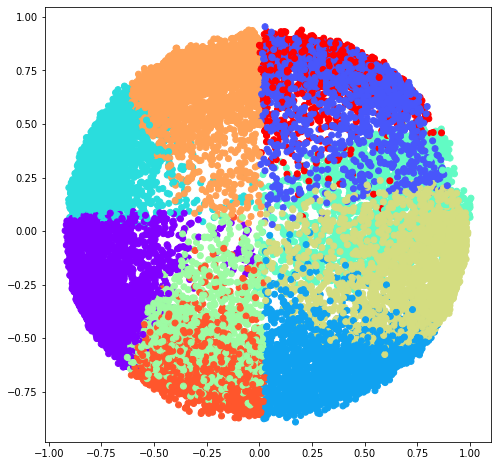

In [101]:
import matplotlib.pyplot as plt

labelle = np.zeros(len(normalized_data[0]))

for i in range(k):
  for j in cluster[i]:
    labelle[j] = i

# print(labelle)
plt.figure(figsize =(8, 8))
plt.scatter(reduced_data['P1'], reduced_data['P2'], c = labelle, cmap ='rainbow')
plt.show()